In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


## Import Dataset and Grab Initial Statistics

In [2]:
#Import Stroke Dataset from Excel file and drop the column named 'id'
file_path  = r"C:\Users\julia\OneDrive\Documents\VS_Code_Data\archive (1)\healthcare-dataset-stroke-data.csv"
data1 = pd.read_csv(file_path)
data1.shape

(5110, 12)

## Data Cleaning and Exploratory Data Analysis (EDA)

In [3]:
data1 = data1.drop(columns=['id'])
data1.rename(columns = {'Residence_type' : 'residence_type'}, inplace = True)
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data1.duplicated().sum()

# No duplicates

np.int64(0)

In [6]:
#Label encoding string values from dataset to numeric

from sklearn.preprocessing import LabelEncoder

encoded_columns = ['gender','ever_married','work_type','residence_type','smoking_status']
legends = {}

for column in encoded_columns:
    label_encoder = LabelEncoder()
    data1[column] = label_encoder.fit_transform(data1[column])
    legends[column] = {label: int(value) for label, value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# The last line of the for loop uses the int() funciton to convert NumPy integers into Python integers when craeting the legend to avoid an output with np.int64()

print("DataFrame after label encoding:")
pd.set_option('display.max_columns',11)
print(data1.head())

print("\nLegend for encoded columns:")
for column, legend in legends.items():
    print(f"{column} legend: {legend}")

DataFrame after label encoding:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21   NaN               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  

Legend for encoded columns:
gender legend: {'Female': 0, 'Male': 1, 'Other': 2}
ever_married legend: {'No': 0, 'Ye

In [7]:
# Isolating data with NaN values for BMI

BMI_NaN_values = data1[data1['bmi'].isna()]
print(f"BMI values that contain NaN: ")
print(BMI_NaN_values)
print(f"\nTotal Number of NaN In BMI: {sum(data1['bmi'].isna())}")

BMI values that contain NaN: 
      gender   age  hypertension  heart_disease  ever_married  work_type  \
1          0  61.0             0              0             1          3   
8          0  59.0             0              0             1          2   
13         1  78.0             0              1             1          2   
19         1  57.0             0              1             0          0   
27         1  58.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5039       1  41.0             0              0             0          2   
5048       1  40.0             0              0             1          2   
5093       0  45.0             1              0             1          0   
5099       1  40.0             0              0             1          2   
5105       0  80.0             1              0             1          2   

      residence_type  avg_glucose_level  bmi  smoking_sta

In [8]:
# Sum the total positive stroke values from BMI_NaN_values data
BMI_NaN_values_strokes = BMI_NaN_values['stroke'].sum()
positive_strokes = data1['stroke'].sum()
print("Number of positive strokes from BMI_NaN_values: ", BMI_NaN_values_strokes)
print("Number of positive strokes from the entire dataset: ", positive_strokes)

Number of positive strokes from BMI_NaN_values:  40
Number of positive strokes from the entire dataset:  249


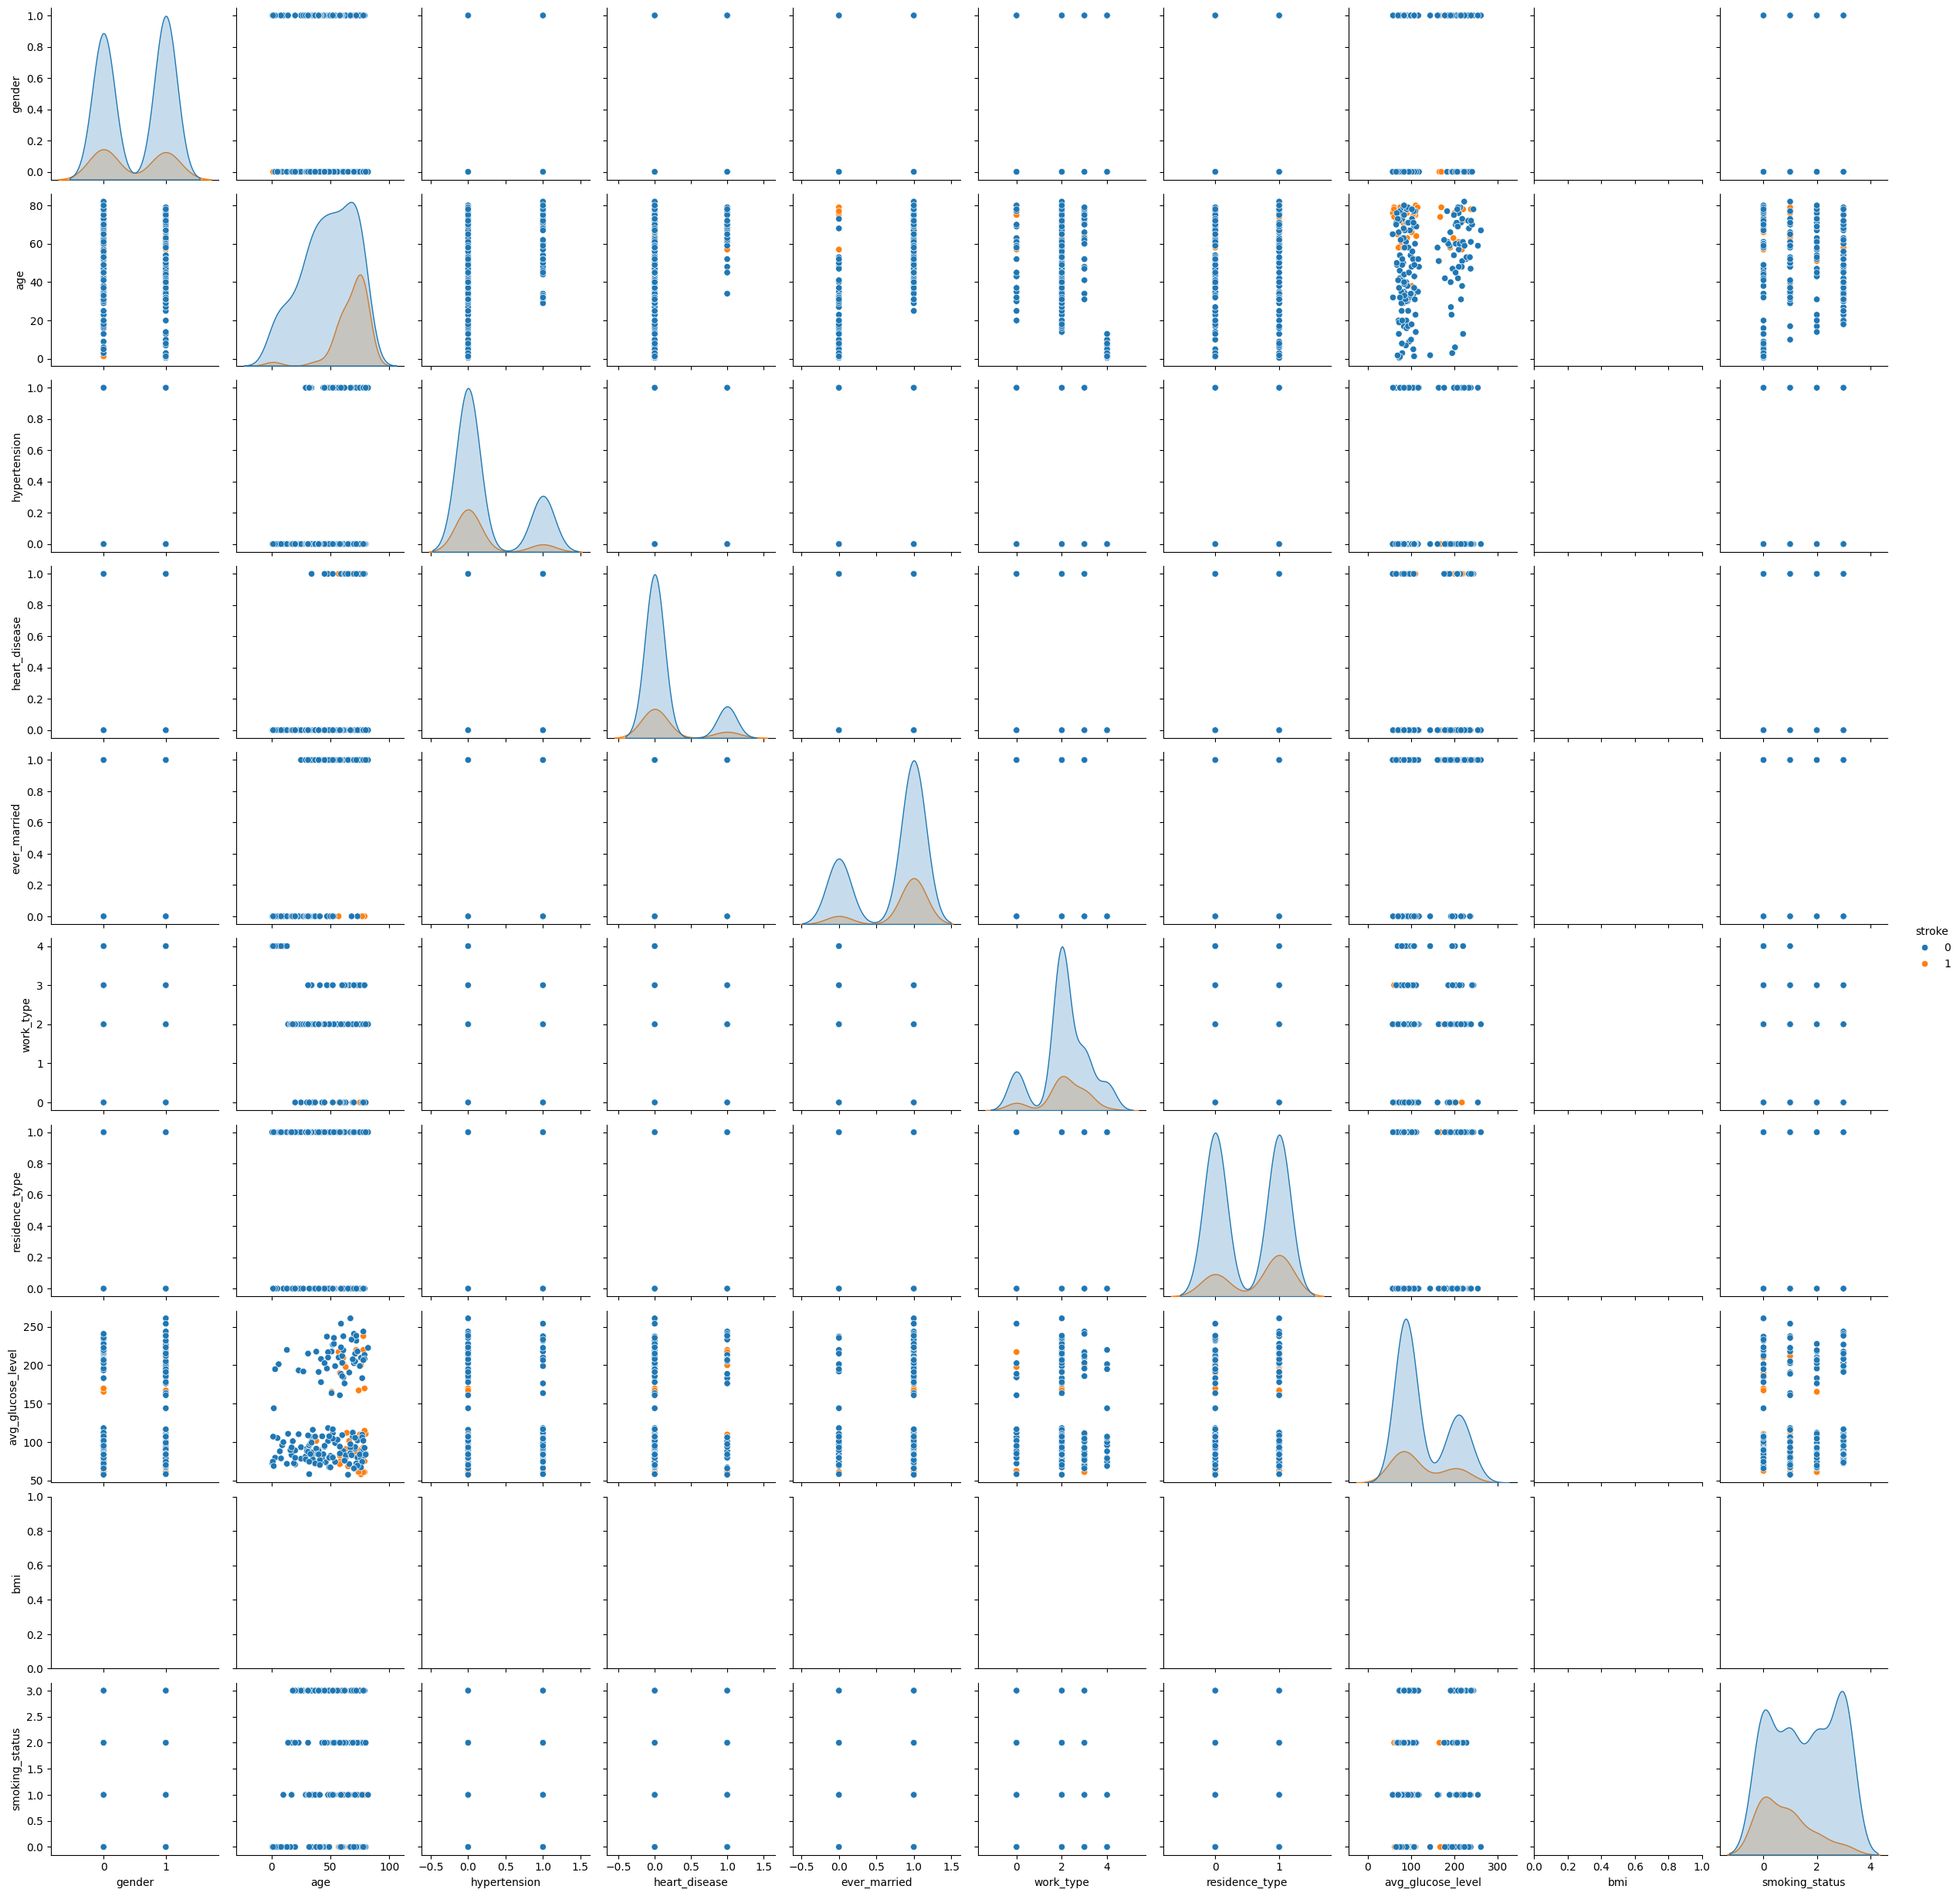

In [9]:
sns.pairplot(data = BMI_NaN_values, hue = 'stroke')

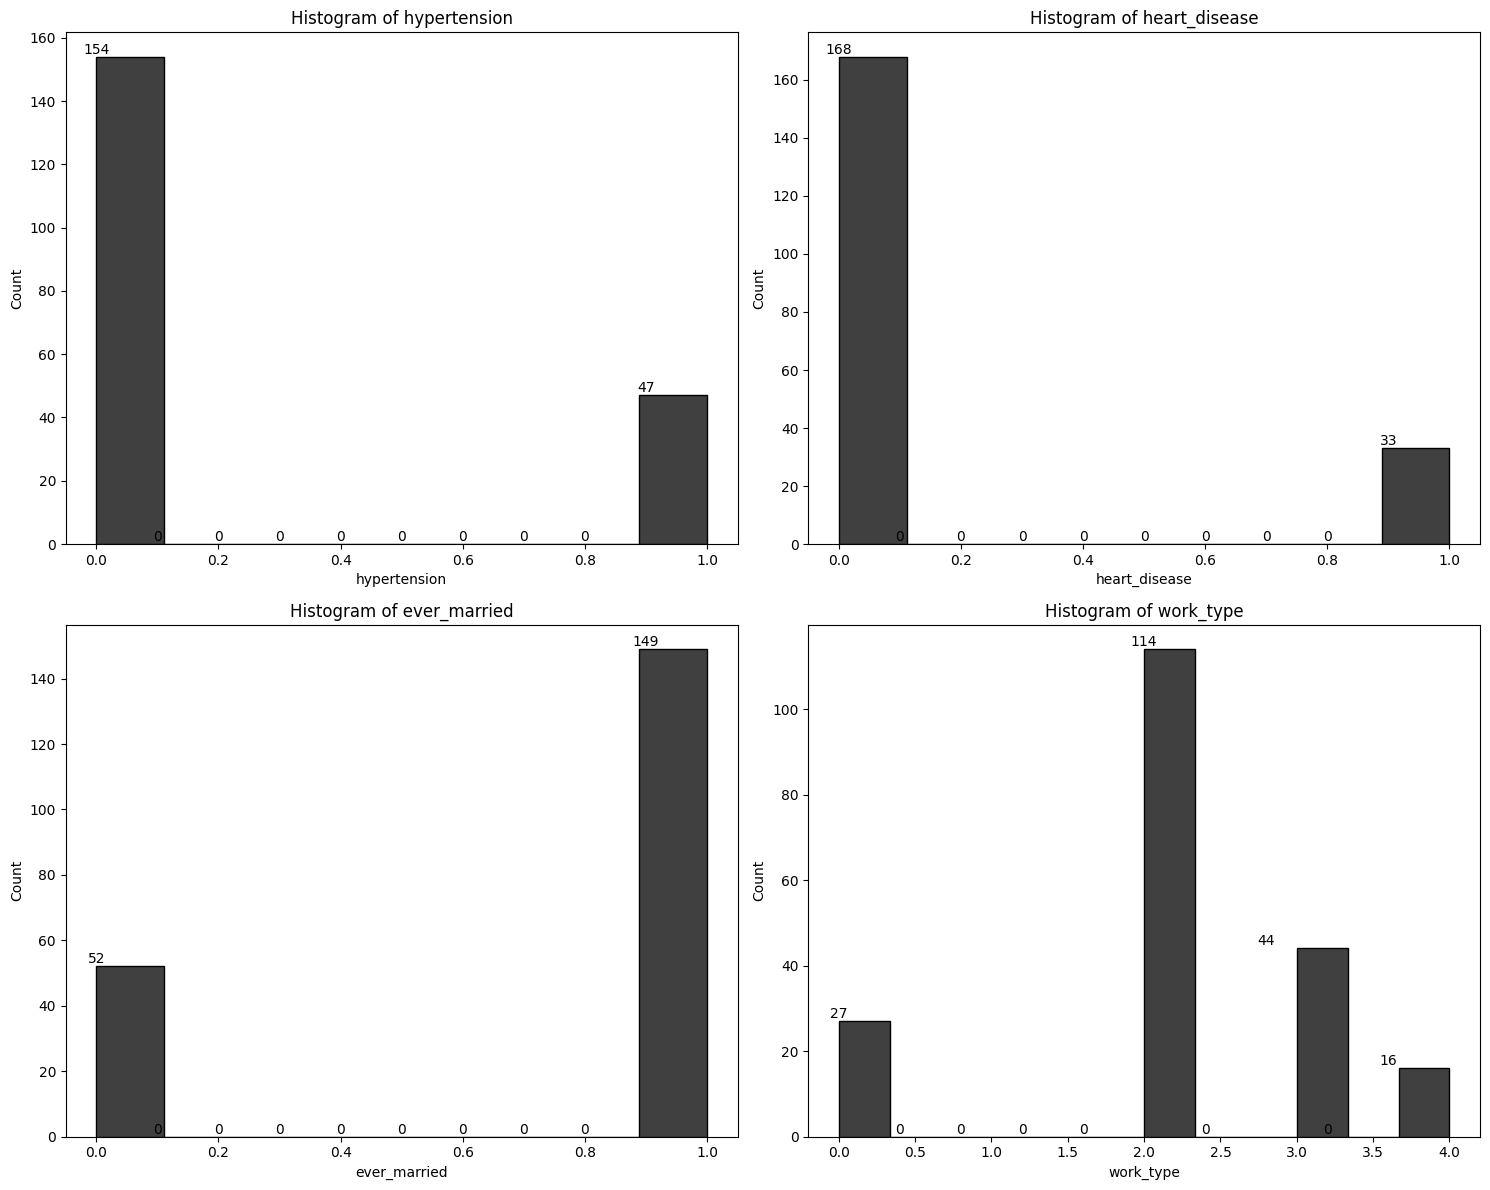

In [10]:
# Different features for patients that have N/A values for BMI

features = ['hypertension', 'heart_disease','ever_married', 'work_type']
rows, cols = 2, 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 12), tight_layout=True)
axes=axes.flatten()

for i, feature in enumerate(features):
    ax = sns.histplot(data=BMI_NaN_values, x=feature, ax=axes[i], color='black')

    if BMI_NaN_values[feature].dtype == 'object':  # Handle categorical data
        counts = BMI_NaN_values[feature].value_counts()
        for category, count in counts.items():
            ax.text(category, count, str(count), va='bottom', ha='center')
    else:

        counts, bin_edges = np.histogram(BMI_NaN_values[feature])
        for count, edge in zip(counts, bin_edges[:-1]):
            ax.text(edge, count, str(count), va='bottom', ha='center')
    
    axes[i].set_title(f"Histogram of {features[i]}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

for j in range(len(features), len(axes)):
    axes[j].axis('off')
plt.show()
    

In [11]:
# Replacing NaN values from BMI column with the mean BMI 

mean_bmi = data1['bmi'].mean(skipna=True)
mean_bmi = round(mean_bmi,2)
data1.fillna(mean_bmi, inplace=True)
data1

# Replaced NaN with mean instead of removing the rows with NaN mainly because of the low number of data in the dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60,1,0


In [12]:
data1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893110,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


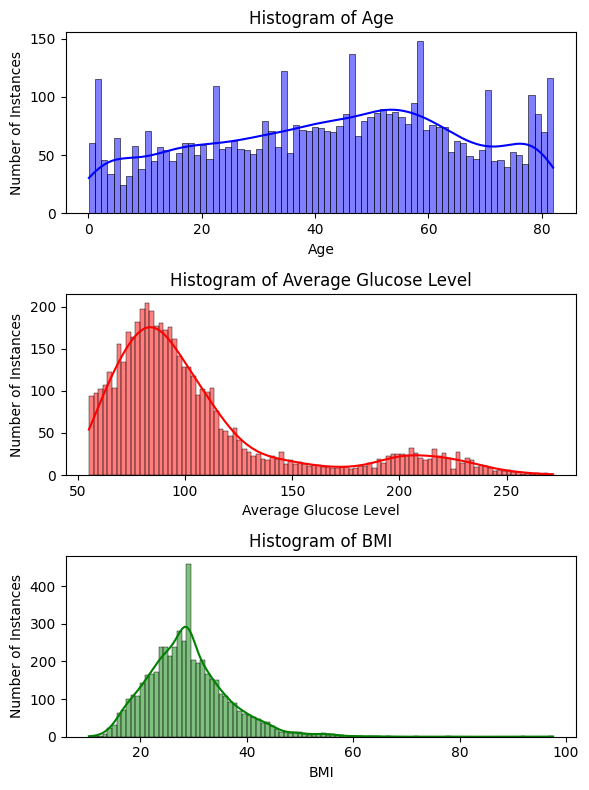

In [13]:


plt.figure(figsize=(6,8))

# Plot Age
plt.subplot(3, 1, 1)
sns.histplot(data1['age'], bins = 75, kde = True, color = 'blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Instances')

# Plot Agv_glucose_level
plt.subplot(3, 1, 2)
sns.histplot(data1['avg_glucose_level'], bins = 100, kde = True, color = 'red')
plt.title('Histogram of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Number of Instances')

# Plot bmi
plt.subplot(3, 1, 3)
sns.histplot(data1['bmi'], bins = 100, kde = True, color = 'green')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Instances')

# Prevent overlap
plt.tight_layout()
plt.show()

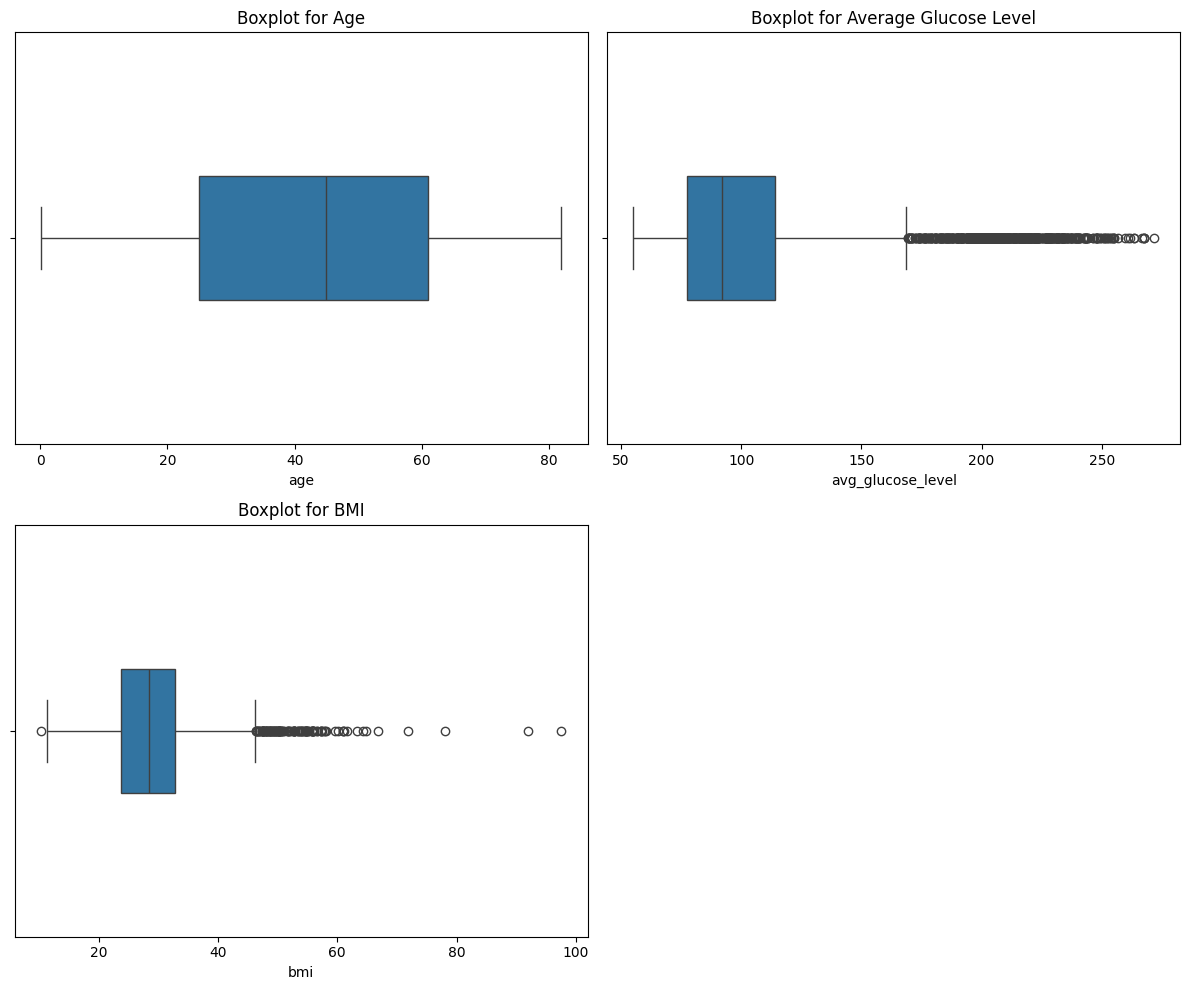

In [14]:
# Checking for outliers

fig, axes = plt.subplots(2, 2, figsize=(12,10), tight_layout=True)

sns.boxplot(x=data1['age'], ax=axes[0,0], width=0.3)
axes[0,0].set_title("Boxplot for Age")

sns.boxplot(x=data1['avg_glucose_level'], ax=axes[0,1], width=0.3)
axes[0,1].set_title("Boxplot for Average Glucose Level")

sns.boxplot(x=data1['bmi'], ax=axes[1,0], width=0.3)
axes[1,0].set_title("Boxplot for BMI")

axes[1,1].axis('off')
plt.show()

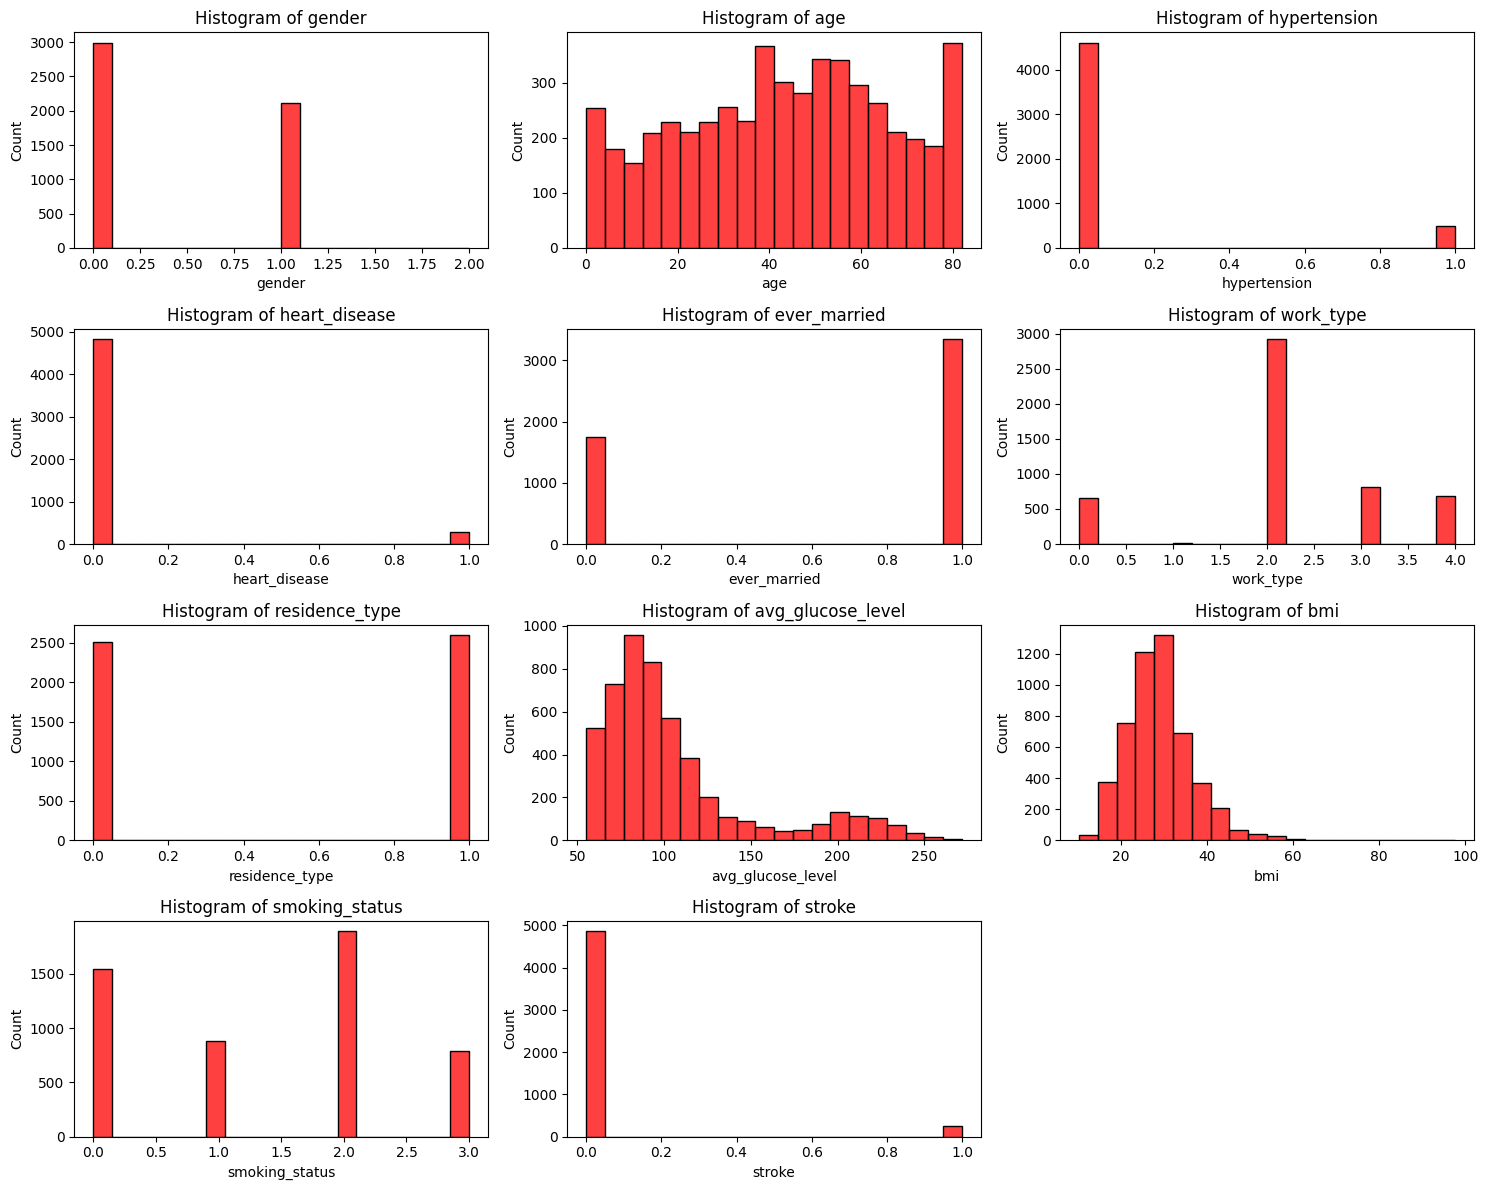

In [15]:
# Histograms for each feature before scaling

feat = data1.columns
num_features = len(feat)
rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15,12), tight_layout=True)
axes = axes.flatten()

for i, feature in enumerate(feat):
    sns.histplot(data1[feature], bins=20, kde=False, ax=axes[i], color='red')
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused plots
for j in range(len(feat), len(axes)):
    axes[j].axis('off')

plt.show()

In [16]:
data1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893110,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [17]:
# Scaling continuous values

# Scaling Age using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaled_cols_minmax = ['age']
scaler_minmax = MinMaxScaler()
data1[scaled_cols_minmax] = scaler_minmax.fit_transform(data1[scaled_cols_minmax])

# Scaling avg_glucose_level and bmi using Robust Scaling
scaled_cols_robust = ['avg_glucose_level', 'bmi']
scaler_robust = RobustScaler()
data1[scaled_cols_robust] = scaler_robust.fit_transform(data1[scaled_cols_robust])
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,3.712987,0.911111,1,1
1,0,0.743652,0,0,1,3,0,2.994300,0.054444,2,1
2,1,0.975586,0,1,1,2,0,0.380920,0.455556,2,1
3,0,0.597168,0,0,1,2,1,2.153481,0.666667,3,1
4,0,0.963379,1,0,1,3,0,2.231917,-0.488889,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,2,1,-0.220790,0.054444,2,0
5106,0,0.987793,0,0,1,3,1,0.904193,1.288889,2,0
5107,0,0.426270,0,0,1,3,0,-0.241417,0.244444,2,0
5108,1,0.621582,0,0,1,2,0,2.019406,-0.311111,1,0


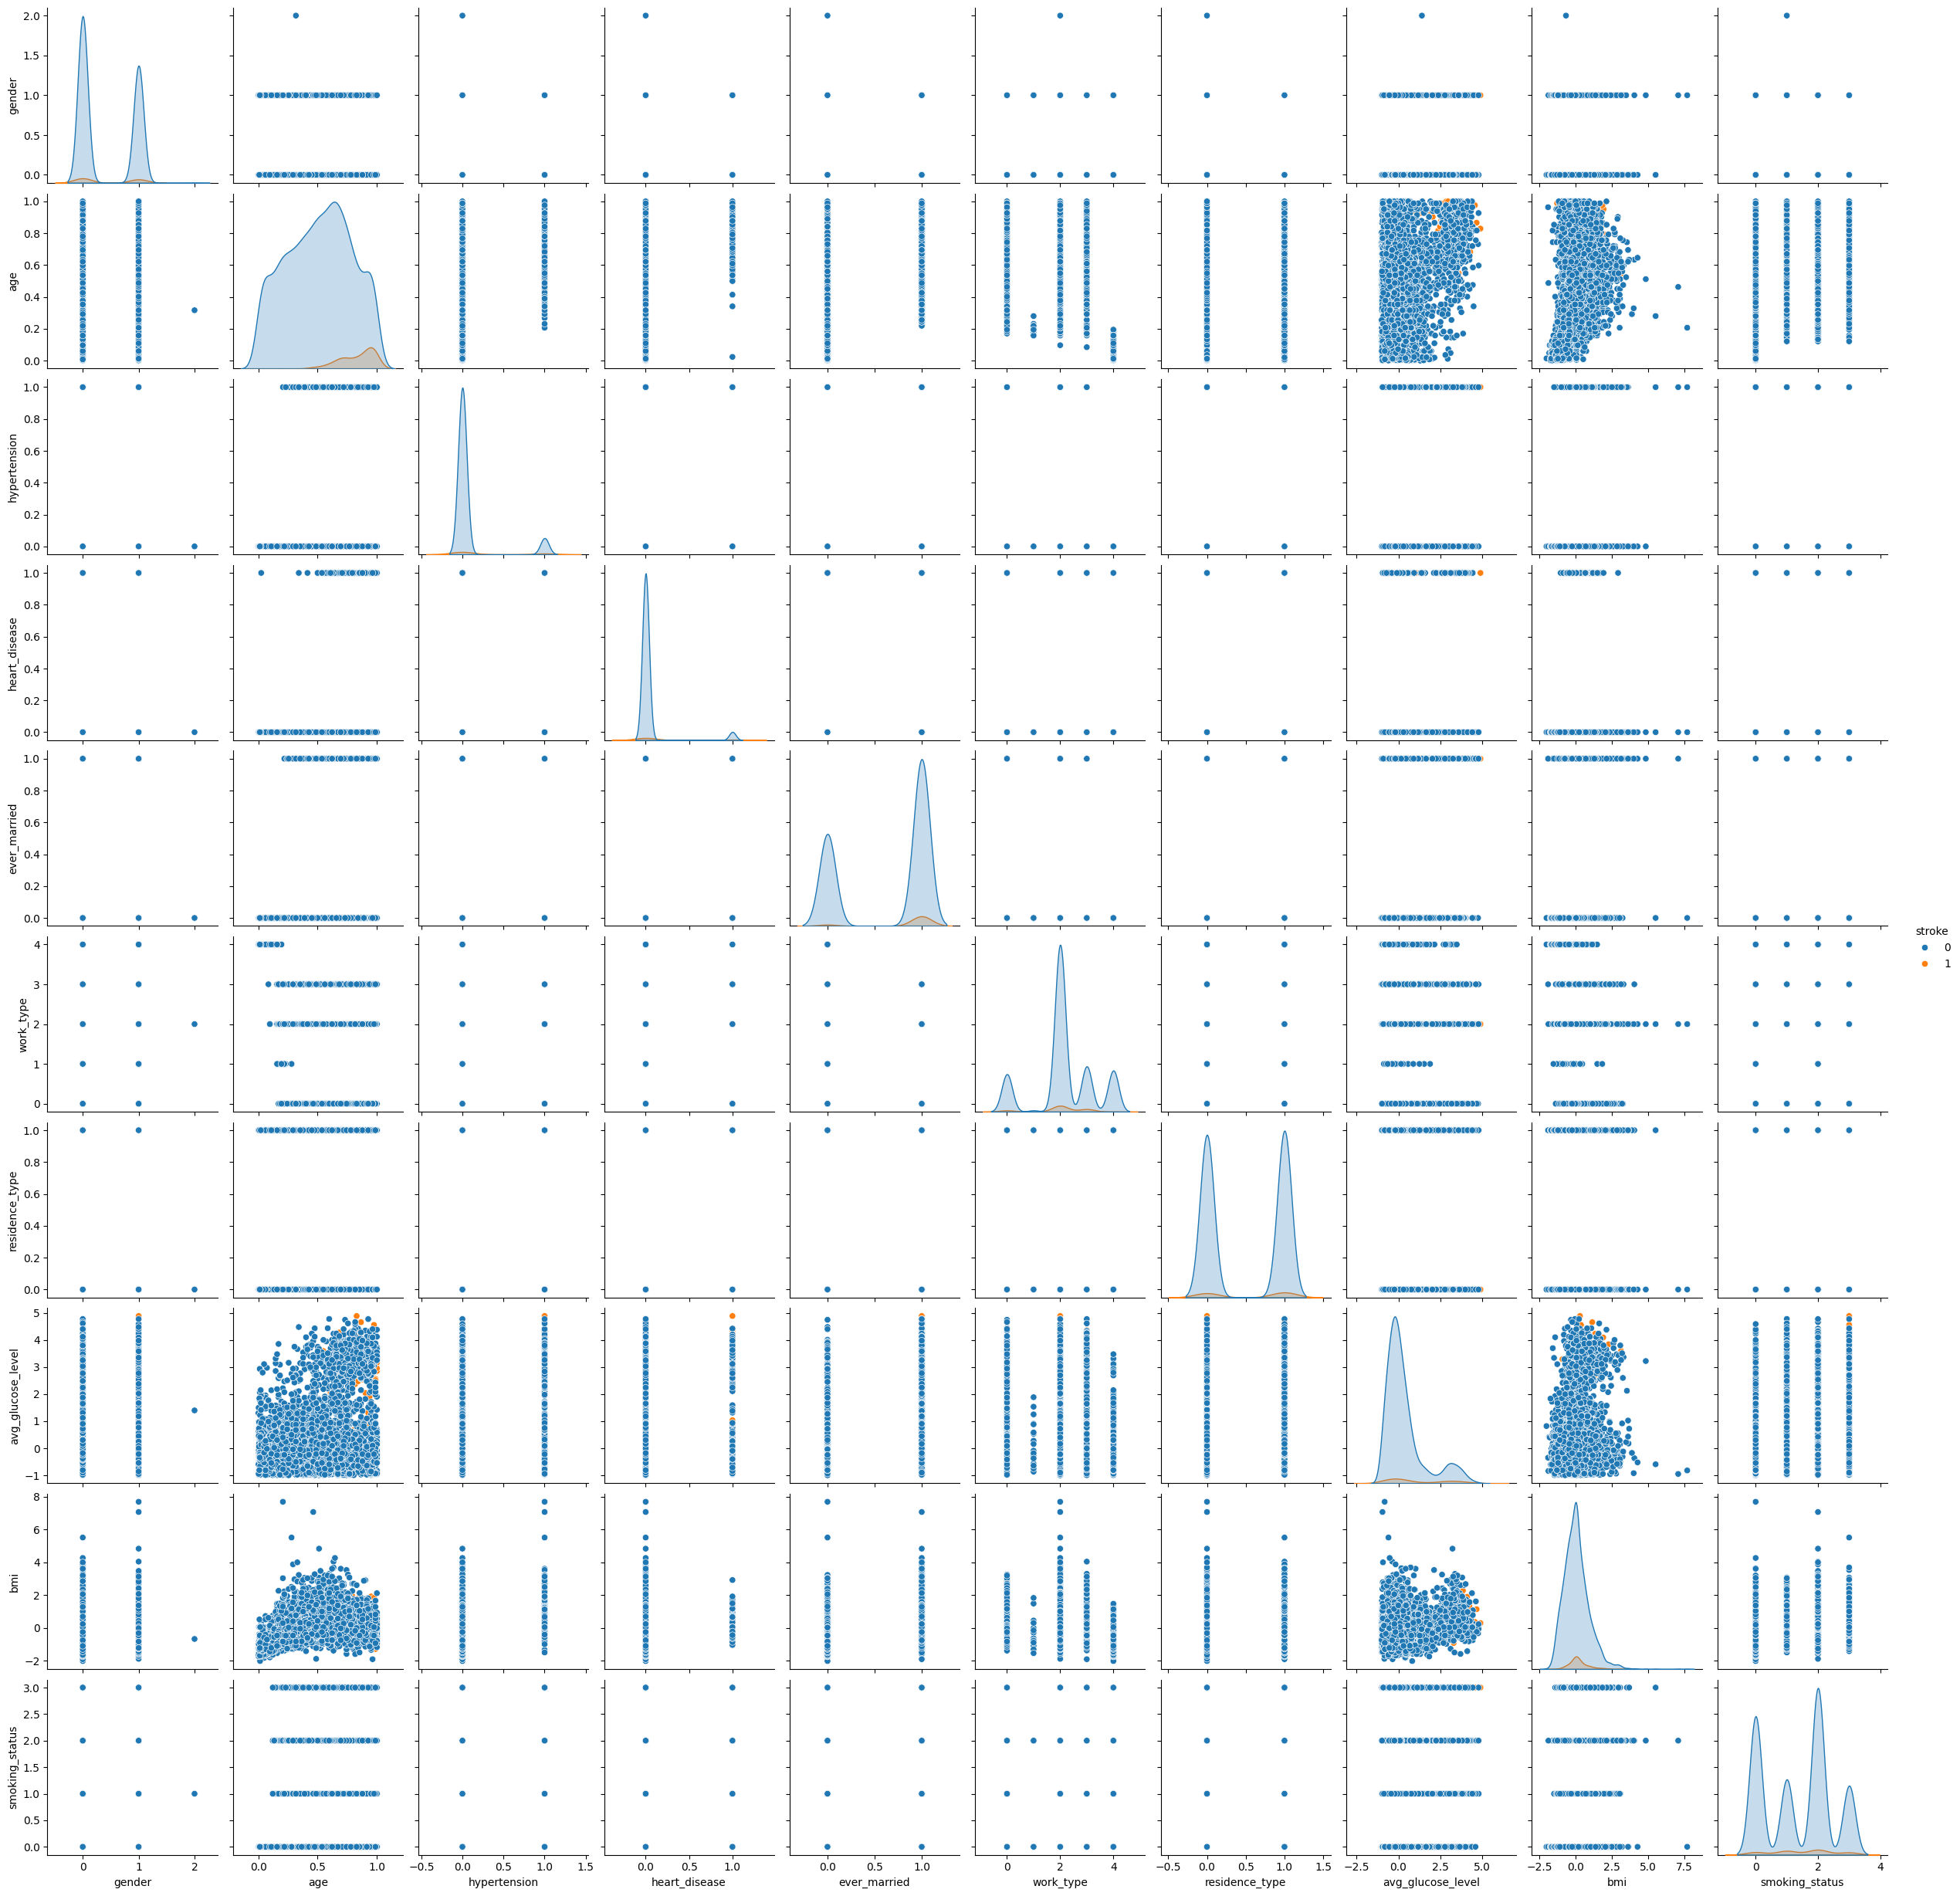

In [18]:
sns.pairplot(data=data1, hue = 'stroke')
plt.show()

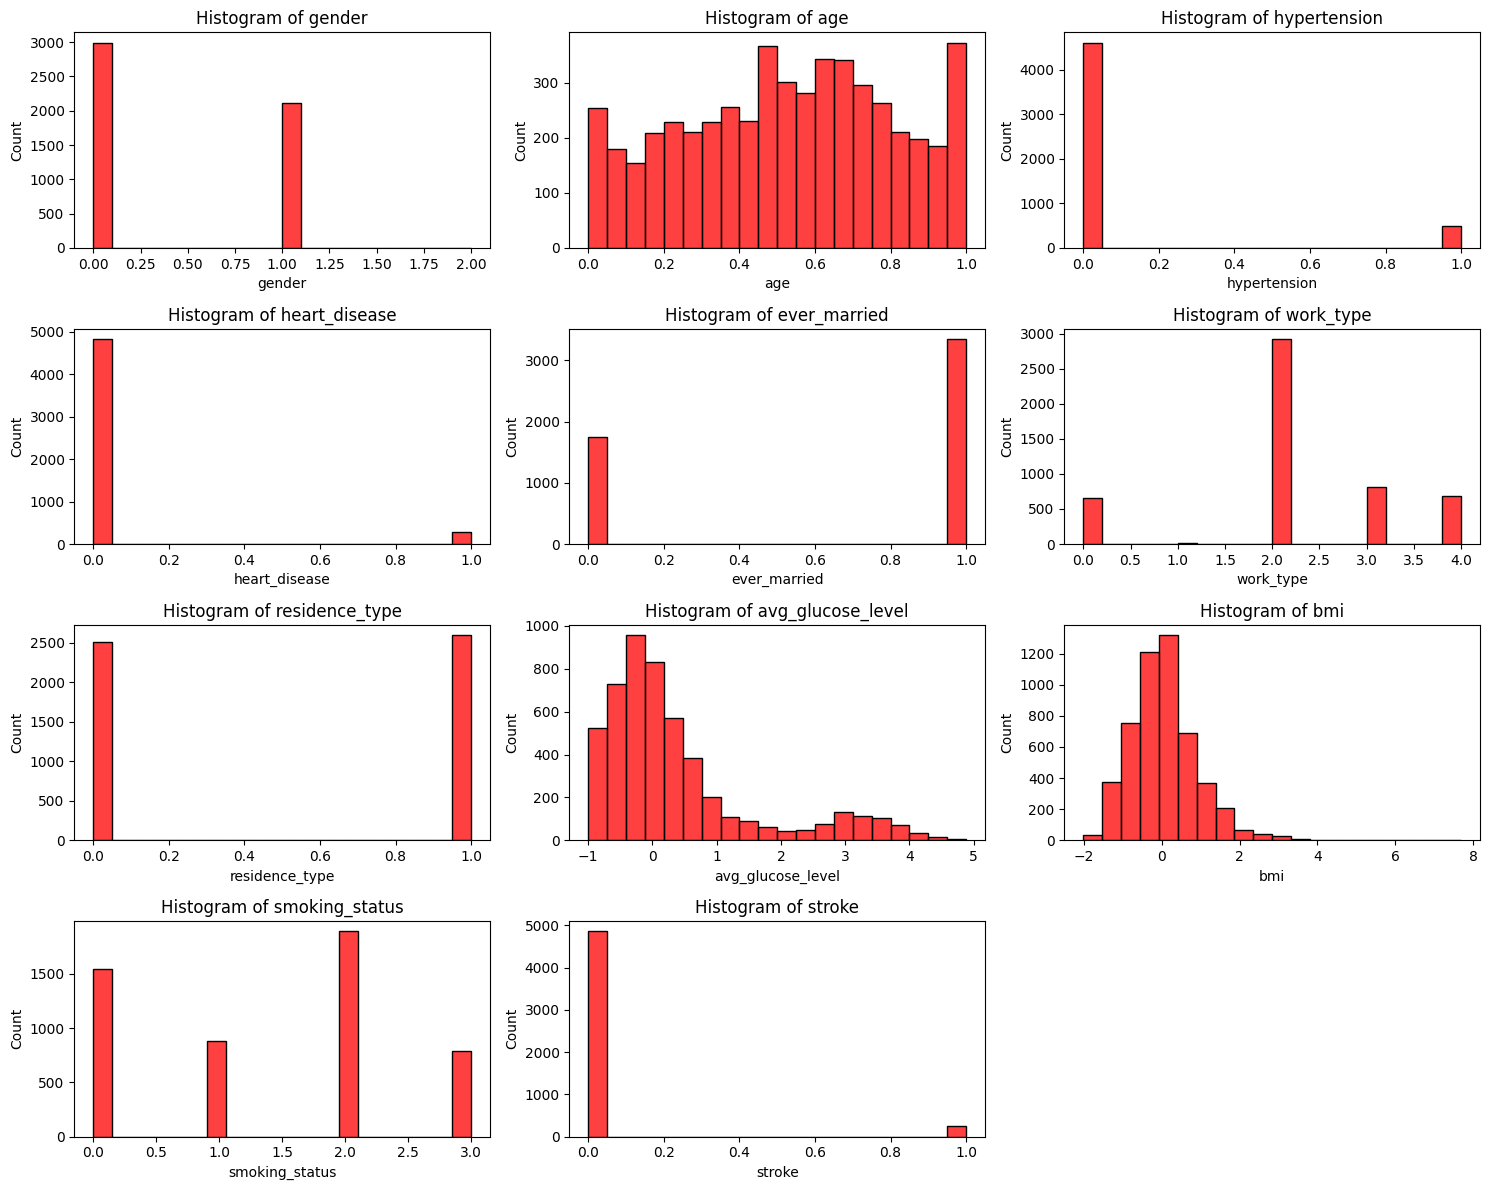

In [19]:
# Histograms for each feature after scaling

feat = data1.columns
num_features = len(feat)
rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15,12), tight_layout=True)
axes = axes.flatten()

for i, feature in enumerate(feat):
    sns.histplot(data1[feature], bins=20, kde=False, ax=axes[i], color='red')
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused plots
for j in range(len(feat), len(axes)):
    axes[j].axis('off')

plt.show()

Total number of patients with stroke: 249
Total number of patients without stroke: 4861


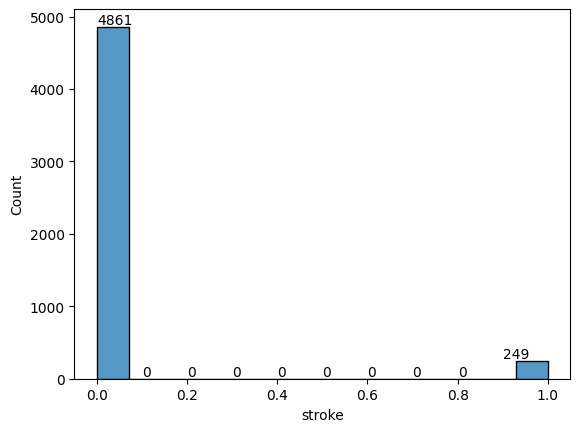

In [20]:
# Visualizing output label

print(f"Total number of patients with stroke: {np.sum(data1['stroke']==1)}")
print(f"Total number of patients without stroke: {np.sum(data1['stroke']==0)}")

ax = sns.histplot(data=data1, x='stroke')
counts, bin_edges = np.histogram(data1['stroke'])

for count, edge in zip(counts, bin_edges[:-1]):
    ax.text(edge, count, str(count), va='bottom')

plt.show()

# Unbalanced dataset. Too much data on negative values for stroke compared to positive values.
# Model will be biased

<Axes: xlabel='age', ylabel='Count'>

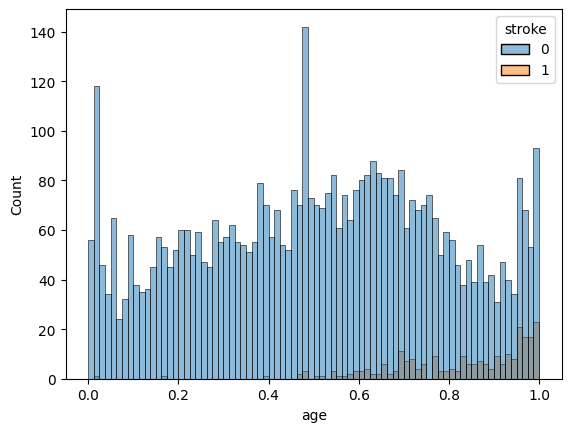

In [21]:
sns.histplot(data=data1, x='age', hue='stroke', bins = 80)

## Building a Model

In [22]:
# Binomial Logistic Regression
# Note: can also use K-Nearest Neighbors, Random Forests, or some other method
# Important to set a good threshold value (precision and recall tradeoff)

In [23]:
# Train and test split
from sklearn.model_selection import train_test_split

X = data1.drop('stroke', axis=1)
y = data1['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training features shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test features shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training features shape: (4088, 10)
Training labels shape: (4088,)
Test features shape: (1022, 10)
Test labels shape: (1022,)


Accuracy: 0.9393346379647749


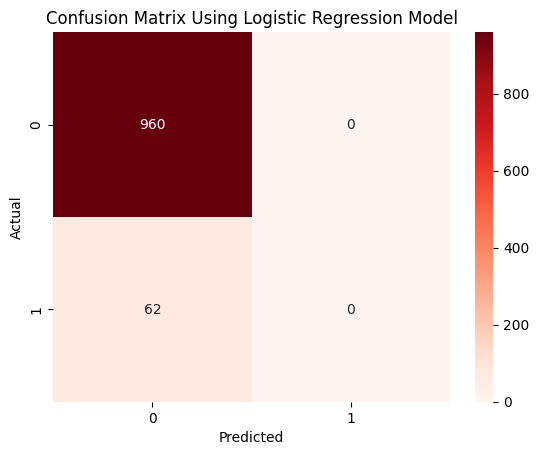

In [24]:
# Binomial Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Logistic Regression Model')
plt.show()

# np.set_printoptions(threshold=np.inf)
# print(y_pred)


# Accuracy_score is not ideal for imbalanced datasets, Considermetrics like precision, recall, F1-score, or ROC-AUC

Accuracy: 0.9256360078277887
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       960
           1       0.39      0.39      0.39        62

    accuracy                           0.93      1022
   macro avg       0.67      0.67      0.67      1022
weighted avg       0.93      0.93      0.93      1022



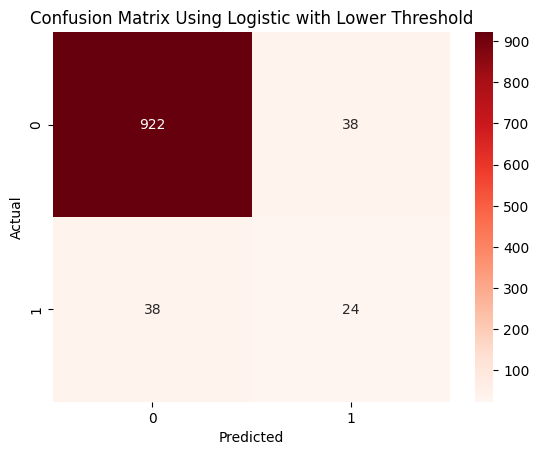

In [25]:
# Adjusting threshold value

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.16
y_pred = (y_proba >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Logistic with Lower Threshold')
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_13300\3069928722.py:2: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])


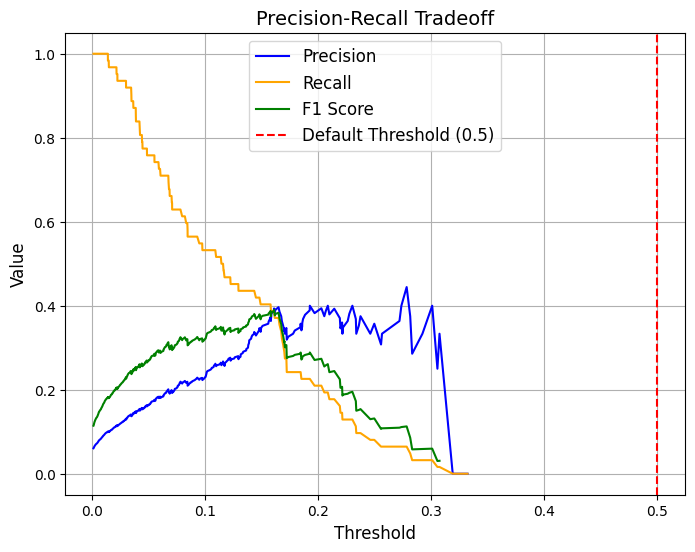

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='orange')
plt.plot(thresholds, f1_scores, label="F1 Score", color="green")
plt.axvline(0.5, color='red', linestyle='--', label="Default Threshold (0.5)")
plt.title("Precision-Recall Tradeoff", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [27]:
# Dimensionality Reduction using Principal Component Analysis

Number of components retained:  3
Variance retained with 3 components:  74.00654465088725


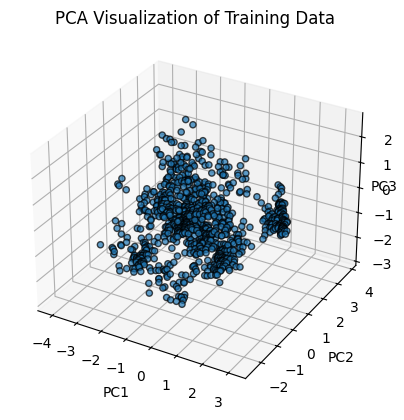

In [28]:
# Perform PCA to retain 3 principal components
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data1_drop = data1.drop(data1.columns[-1], axis=1)

pca = PCA(n_components=3)
data1_drop_pca = pca.fit_transform(data1_drop)
print("Number of components retained: ", pca.n_components_)

# Calculate the total variance retained
var = np.sum(pca.explained_variance_ratio_) * 100
print(f"Variance retained with 3 components: ", var)

# Visualize PCA Components using a smaller data sample for easier visualization
sample_size = int(0.20 * len(data1_drop_pca))
indices = np.random.choice(range(len(data1_drop_pca)), size=sample_size, replace=False)
sample_data = data1_drop_pca[indices]

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(sample_data[:, 0], sample_data[:, 1], sample_data[:, 2], edgecolor='k', alpha=0.7)
ax.set_title("PCA Visualization of Training Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-10)
plt.show()

In [29]:
# Using K-Means Clustering to analize most common features in each cluster
# Reverse-mapping the PCA reduced data back to original features to analyze which features contribute to the clusters
# Used PCA transformation matrix

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

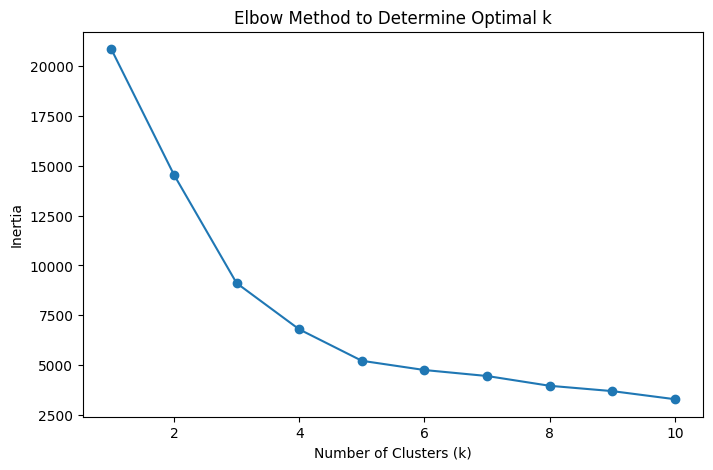

In [31]:
# Choosing optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data1_drop_pca = pd.DataFrame(data1_drop_pca, columns=['PC1', 'PC2', 'PC3'])

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1_drop_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()



Silhouette Score:  0.383883000558773


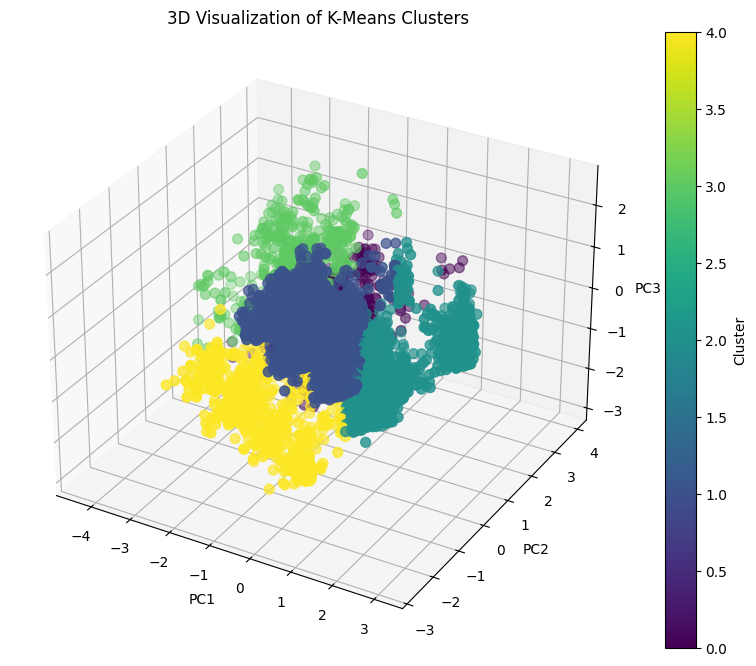

In [32]:
# Perform K-Means Clustering
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data1_drop_pca)

#Assign cluster labels
data1_drop_pca["Cluster"] = kmeans.labels_

# Evaluate cluster performance using silhouette score
silhouette_avg = silhouette_score(data1_drop_pca[['PC1', 'PC2', 'PC3']], kmeans.labels_)
print(f"Silhouette Score: ", silhouette_avg)

# Visualize clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data1_drop_pca['PC1'], data1_drop_pca['PC2'], data1_drop_pca['PC3'], c=data1_drop_pca['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(sc, label='Cluster')
plt.title('3D Visualization of K-Means Clusters')
plt.show()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


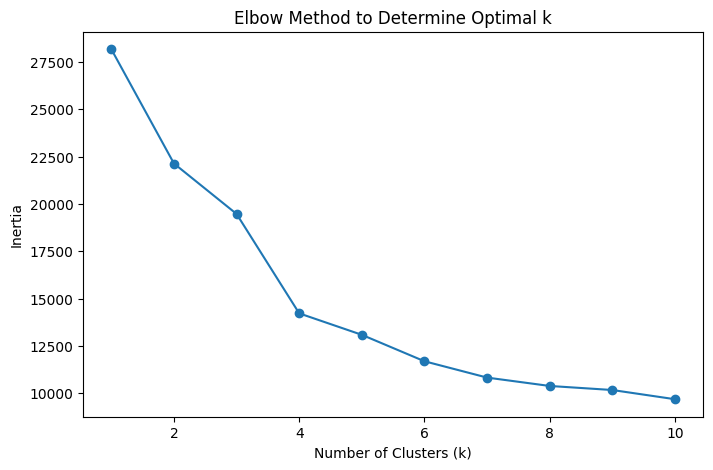

In [33]:
# K-Means Clustering without PCA
# Finding optimal k
data1_drop = data1.drop(data1.columns[-1], axis=1)
print(data1_drop.columns)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1_drop)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [34]:
# Perform K-Means Clustering on non-PCA dataset
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data1_drop)

# Evaluate cluster performance using silhouette score
silhouette_avg = silhouette_score(data1_drop, kmeans.labels_)
print(f"Silhouette Score: ", silhouette_avg)
center = kmeans.cluster_centers_

Silhouette Score:  0.2722951764356259


In [42]:
data1['age_original'] = scaler_minmax.inverse_transform(data1[['age']])
data1[['avg_glucose_level_original', 'bmi_original']] = scaler_robust.inverse_transform(data1[scaled_cols_robust])
data1_drop_unscaled = data1.drop(data1.columns[-4], axis=1)
data1_drop_unscaled

,gender,age,hypertension,heart_disease,ever_married,...,bmi,smoking_status,age_original,avg_glucose_level_original,bmi_original
0,1,0.816895,0,1,1,...,0.911111,1,67.0,228.69,36.60
1,0,0.743652,0,0,1,...,0.054444,2,61.0,202.21,28.89
2,1,0.975586,0,1,1,...,0.455556,2,80.0,105.92,32.50
3,0,0.597168,0,0,1,...,0.666667,3,49.0,171.23,34.40
4,0,0.963379,1,0,1,...,-0.488889,2,79.0,174.12,24.00
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,...,0.054444,2,80.0,83.75,28.89
5106,0,0.987793,0,0,1,...,1.288889,2,81.0,125.20,40.00
5107,0,0.426270,0,0,1,...,0.244444,2,35.0,82.99,30.60
5108,1,0.621582,0,0,1,...,-0.311111,1,51.0,166.29,25.60


In [46]:
print("Stats for Age:")
print(data1_drop_unscaled['age'].describe())
print(data1_drop_unscaled['age_original'].describe())
print("\nStats for avg_glucose_level:")
print(data1_drop_unscaled['avg_glucose_level'].describe())
print(data1_drop_unscaled['avg_glucose_level_original'].describe())
print("\nStats for bmi:")
print(data1_drop_unscaled['bmi'].describe())
print(data1_drop_unscaled['bmi_original'].describe())

Stats for Age:
count    5110.000000
mean        0.526692
std         0.276033
min         0.000000
25%         0.304199
50%         0.548340
75%         0.743652
max         1.000000
Name: age, dtype: float64
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age_original, dtype: float64

Stats for avg_glucose_level:
count    5.110000e+03
mean     3.870994e-01
std      1.229029e+00
min     -9.978287e-01
25%     -3.973402e-01
50%      1.928254e-16
75%      6.026598e-01
max      4.881395e+00
Name: avg_glucose_level, dtype: float64
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level_original, dtype: float64

Stats for bmi:
count    5110.000000
mean        0.054790
std         0.855335
min        -2.011111
25%        -0.511111
50% 

In [45]:
center_df = pd.DataFrame(center, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])

center_df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,0.367250,0.550675,0.097509,0.043455,0.714891,2.206677,0.506094,-0.044422,0.146695,2.302067
1,0.479228,0.727008,0.255193,0.155786,0.882789,1.982196,0.511869,3.136937,0.499796,1.603858
2,0.371972,0.590727,0.088235,0.043253,0.788927,0.024221,0.527682,-0.028118,0.178353,1.621107
3,0.408985,0.589793,0.069713,0.048799,0.737413,2.213788,0.502711,-0.044222,0.155878,0.453137
4,0.526471,0.087363,0.001471,0.001471,0.001471,3.977941,0.502941,0.030809,-0.938273,0.130882
